In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart

%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import graphviz
import pydotplus
import pandas as pd
from sklearn import tree
from io import StringIO

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


no display found. Using non-interactive Agg backend


In [2]:
data = pd.read_excel("USMassShootings.xlsx")
data.head()

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,...,Yes,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,Yes,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,...,Yes,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,No,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,...,No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,...,NaN,Unknown,Two handguns and a butcher knife,2,No,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,9/16/2013,2013,"Aaron Alexis, 34, a military veteran and contr...",12,...,Yes,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,No,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CASE                       71 non-null     object 
 1   GENDER                     71 non-null     object 
 2   SHOOTINGTYPE               71 non-null     object 
 3   RACE                       71 non-null     object 
 4   LOCATION                   71 non-null     object 
 5   STATE                      71 non-null     object 
 6   DATE                       71 non-null     object 
 7   YEAR                       71 non-null     int64  
 8   SUMMARY                    71 non-null     object 
 9   FATALITIES                 71 non-null     int64  
 10  WOUNDED                    71 non-null     int64  
 11  TOTALVICTIMS               71 non-null     int64  
 12  LOCATIONTYPE               71 non-null     object 
 13  PRIORSIGNSOFMENTALILLNESS  71 non-null     object 
 

In [4]:
data.drop('SUMMARY', inplace=True, axis=1)

In [5]:
data.drop('CASE', inplace=True, axis=1)

In [83]:
data.drop('LOCATION', inplace=True, axis=1)

In [84]:
data.drop('SOURCES', inplace=True, axis=1)

In [85]:
data.drop('WEAPONDETAILS', inplace=True, axis=1)

In [86]:
data.drop('TYPEOFWEAPONS', inplace=True, axis=1)

In [87]:
data.drop('MENTALHEALTHSOURCES', inplace=True, axis=1)

In [88]:
data.drop('MENTALHEALTHNOTES', inplace=True, axis=1)

In [89]:
data.drop('WHEREWEAPONOBTAINED', inplace=True, axis=1)


In [90]:
data.drop('DATE', inplace=True, axis=1)


In [91]:
data.drop('STATE', inplace=True, axis=1)


In [92]:
data.head()

,GENDER,SHOOTINGTYPE,RACE,YEAR,FATALITIES,WOUNDED,TOTALVICTIMS,LOCATIONTYPE,PRIORSIGNSOFMENTALILLNESS,WEAPONSOBTAINEDLEGALLY,NUMWEAPONS,ASSAULT,LATITUDE,LONGITUDE
0,Male,Mass,Middle Eastern,2015,5,2,7,Military,Yes,Yes,3,Yes,35.047157,-85.311821
1,Male,Mass,White,2015,9,1,10,Religious,No,Yes,1,No,32.788387,-79.933144
2,Male,Mass,Native American,2014,5,1,6,School,No,No,1,No,48.050823,-122.176918
3,Female,Mass,Native American,2014,4,2,6,Other,No,NaN,2,No,41.487103,-120.542236
4,Male,Mass,Black,2013,12,8,20,Military,Yes,Yes,1,No,38.874981,-76.994530


In [93]:
data.isnull().sum()

GENDER                       0
SHOOTINGTYPE                 0
RACE                         0
YEAR                         0
FATALITIES                   0
WOUNDED                      0
TOTALVICTIMS                 0
LOCATIONTYPE                 0
PRIORSIGNSOFMENTALILLNESS    0
WEAPONSOBTAINEDLEGALLY       2
NUMWEAPONS                   0
ASSAULT                      0
LATITUDE                     0
LONGITUDE                    0
dtype: int64

In [94]:
a = data.fillna("No")

In [95]:
a.isnull().sum()

GENDER                       0
SHOOTINGTYPE                 0
RACE                         0
YEAR                         0
FATALITIES                   0
WOUNDED                      0
TOTALVICTIMS                 0
LOCATIONTYPE                 0
PRIORSIGNSOFMENTALILLNESS    0
WEAPONSOBTAINEDLEGALLY       0
NUMWEAPONS                   0
ASSAULT                      0
LATITUDE                     0
LONGITUDE                    0
dtype: int64

In [96]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     71 non-null     object 
 1   SHOOTINGTYPE               71 non-null     object 
 2   RACE                       71 non-null     object 
 3   YEAR                       71 non-null     int64  
 4   FATALITIES                 71 non-null     int64  
 5   WOUNDED                    71 non-null     int64  
 6   TOTALVICTIMS               71 non-null     int64  
 7   LOCATIONTYPE               71 non-null     object 
 8   PRIORSIGNSOFMENTALILLNESS  71 non-null     object 
 9   WEAPONSOBTAINEDLEGALLY     71 non-null     object 
 10  NUMWEAPONS                 71 non-null     int64  
 11  ASSAULT                    71 non-null     object 
 12  LATITUDE                   71 non-null     float64
 13  LONGITUDE                  71 non-null     float64
d

In [97]:
numeric_cols = ['YEAR', 'FATALITIES', 'WOUNDED', 'TOTALVICTIMS', 'NUMWEAPONS', 'LATITUDE', 'LONGITUDE']

In [98]:
categorical_cols = ['GENDER', 'SHOOTINGTYPE', 'RACE', 'LOCATIONTYPE', 'WEAPONSOBTAINEDLEGALLY', 'ASSAULT'] 


In [99]:
target=a.PRIORSIGNSOFMENTALILLNESS

In [100]:
inputs=a.drop('PRIORSIGNSOFMENTALILLNESS',axis='columns')

In [101]:
dummies = pd.get_dummies(data=inputs, columns=['GENDER', 'SHOOTINGTYPE', 'RACE', 'ASSAULT', 'LOCATIONTYPE', 'WEAPONSOBTAINEDLEGALLY'])

In [102]:
dummies.head()

,YEAR,FATALITIES,WOUNDED,TOTALVICTIMS,NUMWEAPONS,LATITUDE,LONGITUDE,GENDER_Female,GENDER_Male,SHOOTINGTYPE_Mass,...,RACE_White,ASSAULT_No,ASSAULT_Yes,LOCATIONTYPE_Military,LOCATIONTYPE_Other,LOCATIONTYPE_Religious,LOCATIONTYPE_School,LOCATIONTYPE_Workplace,WEAPONSOBTAINEDLEGALLY_No,WEAPONSOBTAINEDLEGALLY_Yes
0,2015,5,2,7,3,35.047157,-85.311821,0,1,1,...,0,0,1,1,0,0,0,0,0,1
1,2015,9,1,10,1,32.788387,-79.933144,0,1,1,...,1,1,0,0,0,1,0,0,0,1
2,2014,5,1,6,1,48.050823,-122.176918,0,1,1,...,0,1,0,0,0,0,1,0,1,0
3,2014,4,2,6,2,41.487103,-120.542236,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,2013,12,8,20,1,38.874981,-76.994530,0,1,1,...,0,1,0,1,0,0,0,0,0,1


In [103]:
dummies.drop(['YEAR', 'FATALITIES', 'WOUNDED', 'TOTALVICTIMS', 'NUMWEAPONS', 'LATITUDE', 'LONGITUDE'], axis=1, inplace=True)

In [104]:
dummies.head()

,GENDER_Female,GENDER_Male,SHOOTINGTYPE_Mass,SHOOTINGTYPE_Spree,RACE_Asian,RACE_Black,RACE_Latino,RACE_Middle Eastern,RACE_Native American,RACE_Other,RACE_White,ASSAULT_No,ASSAULT_Yes,LOCATIONTYPE_Military,LOCATIONTYPE_Other,LOCATIONTYPE_Religious,LOCATIONTYPE_School,LOCATIONTYPE_Workplace,WEAPONSOBTAINEDLEGALLY_No,WEAPONSOBTAINEDLEGALLY_Yes
0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1
2,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [105]:
inputs.head()

,GENDER,SHOOTINGTYPE,RACE,YEAR,FATALITIES,WOUNDED,TOTALVICTIMS,LOCATIONTYPE,WEAPONSOBTAINEDLEGALLY,NUMWEAPONS,ASSAULT,LATITUDE,LONGITUDE
0,Male,Mass,Middle Eastern,2015,5,2,7,Military,Yes,3,Yes,35.047157,-85.311821
1,Male,Mass,White,2015,9,1,10,Religious,Yes,1,No,32.788387,-79.933144
2,Male,Mass,Native American,2014,5,1,6,School,No,1,No,48.050823,-122.176918
3,Female,Mass,Native American,2014,4,2,6,Other,No,2,No,41.487103,-120.542236
4,Male,Mass,Black,2013,12,8,20,Military,Yes,1,No,38.874981,-76.994530


In [106]:
inputs.drop(['GENDER', 'SHOOTINGTYPE', 'RACE', 'LOCATIONTYPE', 'WEAPONSOBTAINEDLEGALLY', 'ASSAULT'], axis=1, inplace=True)

In [107]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,YEAR,FATALITIES,WOUNDED,TOTALVICTIMS,NUMWEAPONS,LATITUDE,LONGITUDE,GENDER_Female,GENDER_Male,SHOOTINGTYPE_Mass,...,RACE_White,ASSAULT_No,ASSAULT_Yes,LOCATIONTYPE_Military,LOCATIONTYPE_Other,LOCATIONTYPE_Religious,LOCATIONTYPE_School,LOCATIONTYPE_Workplace,WEAPONSOBTAINEDLEGALLY_No,WEAPONSOBTAINEDLEGALLY_Yes
0,2015,5,2,7,3,35.047157,-85.311821,0,1,1,...,0,0,1,1,0,0,0,0,0,1
1,2015,9,1,10,1,32.788387,-79.933144,0,1,1,...,1,1,0,0,0,1,0,0,0,1
2,2014,5,1,6,1,48.050823,-122.176918,0,1,1,...,0,1,0,0,0,0,1,0,1,0
3,2014,4,2,6,2,41.487103,-120.542236,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,2013,12,8,20,1,38.874981,-76.994530,0,1,1,...,0,1,0,1,0,0,0,0,0,1


In [108]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

## Full Class Tree

In [109]:
X = inputs
y = data['PRIORSIGNSOFMENTALILLNESS']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.25, random_state=1)

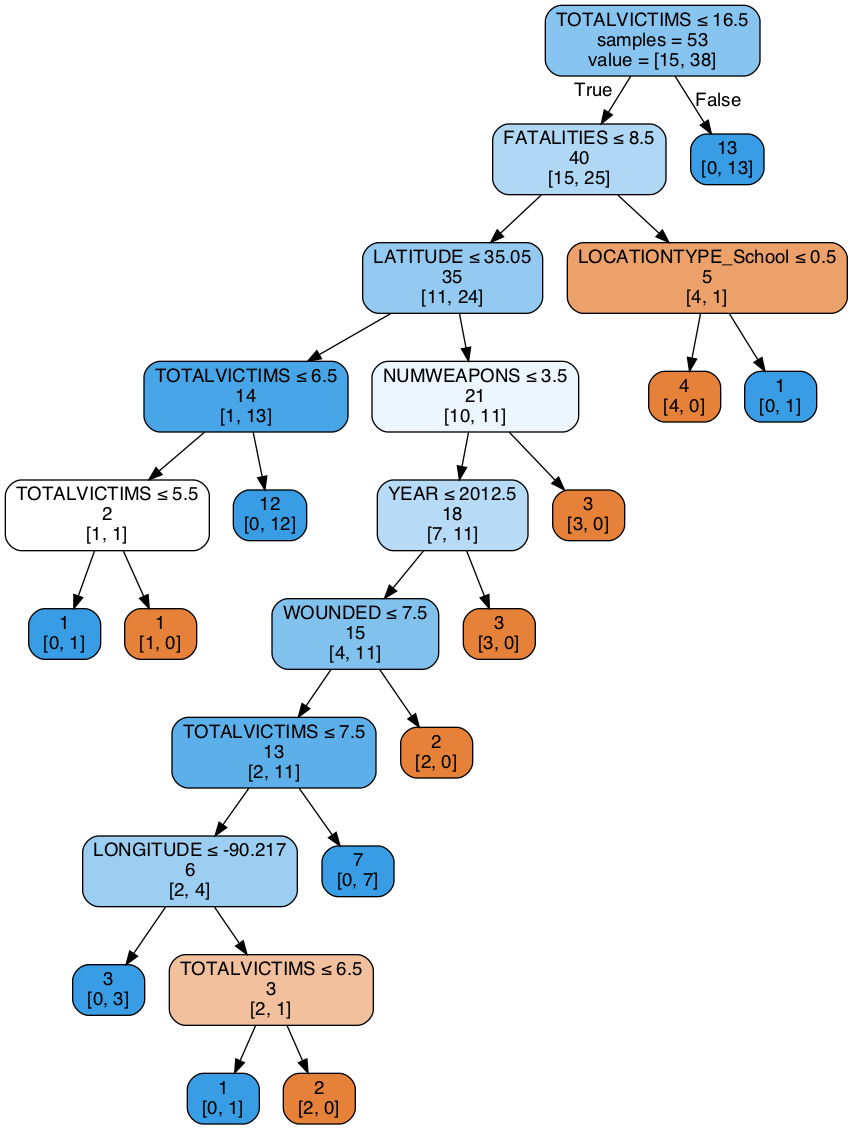

In [110]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [111]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual  0  1
     0 15  0
     1  0 38
Confusion Matrix (Accuracy 0.5000)

       Prediction
Actual 0 1
     0 1 6
     1 3 8


## Small Class Tree

In [129]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')
accuracy = (1+8)/(1+8+6+3)
print(f"The accuracy score is: {accuracy}.")
precision = 1/(6+1)
precision = round(precision, 3)
print(f"The precision score is: {precision}.")
recall = 1/(3+1)
print(f"The recall score is: {recall}.")
f1 = (2*precision*recall)/(precision+recall)
f1 = round(f1,3)
print(f"The f1 score is: {f1}.")

Accuracy scores of each fold:  ['0.455', '0.545', '0.818', '0.100', '0.700']
Accuracy: 0.524 (+/- 0.492)
Accuracy: 0.524 (+/- 0.246)
The accuracy score is: 0.5.
The precision score is: 0.143.
The recall score is: 0.25.
The f1 score is: 0.182.


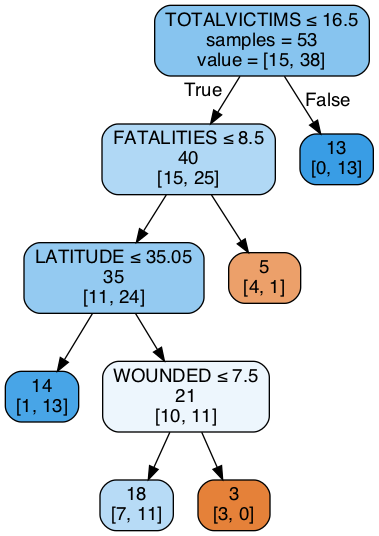

In [113]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [114]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8302)

       Prediction
Actual  0  1
     0  7  8
     1  1 37
Confusion Matrix (Accuracy 0.5556)

       Prediction
Actual  0  1
     0  0  7
     1  1 10


In [127]:
precision = 0
print(f"The precision score is: {precision}.")
recall = 0
print(f"The recall score is: {recall}.")
accuracy = (0+10)/(0+7+1+10)
accuracy = round(accuracy, 3)
print(f"The accuracy score is: {accuracy}.")
f1 = 0
print(f"The f1 score is: {f1}.")

The precision score is: 0.
The recall score is: 0.
The accuracy score is: 0.556.
The f1 score is: 0.


In [115]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.7163636363636364
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 60}
Improved score:  0.5818181818181818
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.0009, 'min_samples_split': 10}


# bestClassTree

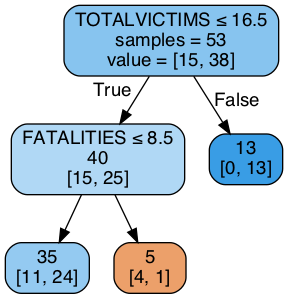

In [116]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [118]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7736)

       Prediction
Actual  0  1
     0  4 11
     1  1 37
Confusion Matrix (Accuracy 0.5556)

       Prediction
Actual  0  1
     0  0  7
     1  1 10


In [126]:
precision = 0
print(f"The precision score is: {precision}.")
recall = 0
print(f"The recall score is: {recall}.")
accuracy = (10/(0+7+1+10))
accuracy = round(accuracy,3)
print(f"The accuracy score is: {accuracy}.")
f1 = 0
f1 = round(f1,3)
print(f"The f1 score is: {f1}.")

The precision score is: 0.
The recall score is: 0.
The accuracy score is: 0.556.
The f1 score is: 0.
